In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/lung-and-colon-cancer-histopathological-images")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lung-and-colon-cancer-histopathological-images


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

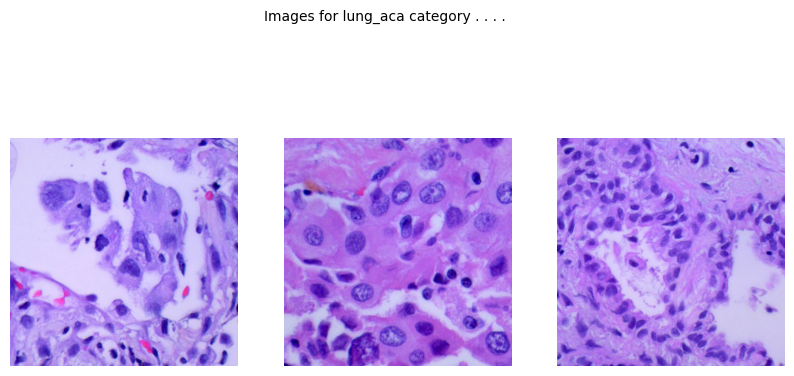

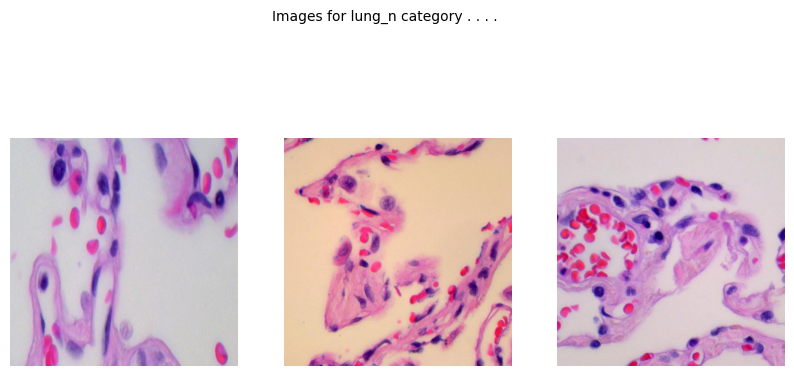

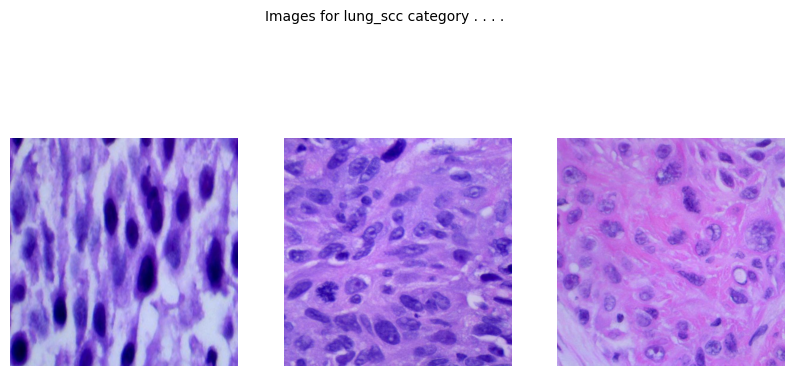

In [13]:
path = '/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets'
classes = ['lung_aca', 'lung_n', 'lung_scc']
num_classes = len(classes)
for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)

    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    fig.suptitle(f'Images for {cat} category . . . .', fontsize=10)

    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

In [20]:
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
EPOCHS = 50
NUM_CLASSES = 3
path = '/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets'  # Change to your dataset folder
classes = ['lung_aca', 'lung_n', 'lung_scc']

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    classes=classes,
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,  # Important for correct evaluation
    classes=classes
)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [17]:
def create_cnn_model(input_shape=(224, 224, 3), num_classes=3):
    model = Sequential([
        # Block 1
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        # Block 2
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        # Block 3
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        GlobalAveragePooling2D(),

        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_cnn_model(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), num_classes=NUM_CLASSES)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,939 (499.76 KB)

 Trainable params: 127,491 (498.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
    ),

    ModelCheckpoint(
        filepath='best_lung_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    ),

    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
]


In [21]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks
)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.7989 - loss: 0.4584
Epoch 1: val_loss improved from inf to 1.89300, saving model to best_lung_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 285s 747ms/step - accuracy: 0.7990 - loss: 0.4581 - val_accuracy: 0.3333 - val_loss: 1.8930 - learning_rate: 1.0000e-04
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.8869 - loss: 0.2699
Epoch 2: val_loss improved from 1.89300 to 0.39491, saving model to best_lung_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 213s 568ms/step - accuracy: 0.8869 - loss: 0.2699 - val_accuracy: 0.8013 - val_loss: 0.3949 - learning_rate: 1.0000e-04
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.9152 - loss: 0.2146
Epoch 3: val_loss improved from 0.39491 to 0.21707, saving model to best_lung_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 264s 705ms/step - accuracy: 0.9152 - loss: 0.2146 - val_accuracy: 0.8993 - val_loss: 0.2171 - learning_rate: 1.0000e-04
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.9254 - loss: 0.1893
Epoch 4: val_loss did not improve from 0.21707
375/375 ━━━━━━━━━━━━━━━━━━━━ 210s 559ms/step - accuracy: 0.9254 - loss: 0.1893 - val_accuracy: 0.8907 - val_loss: 0.2482 - learning_rate: 1.0000e-04
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.9276 - loss: 0.1832
Epoch 5: val_loss improved from 0.21707 to 0.19236, saving model to best_lung_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 209s 557ms/step - accuracy: 0.9276 - loss: 0.1832 - val_accuracy: 0.9207 - val_loss: 0.1924 - learning_rate: 1.0000e-04
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.9346 - loss: 0.1696
Epoch 6: val_loss did not improve from 0.19236
375/375 ━━━━━━━━━━━━━━━━━━━━ 211s 561ms/step - accuracy: 0.9346 - loss: 0.1696 - val_accuracy: 0.9060 - val_loss: 0.2192 - learning_rate: 1.0000e-04
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.9371 - loss: 0.1541
Epoch 7: val_loss improved from 0.19236 to 0.13836, saving model to best_lung_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 217s 579ms/step - accuracy: 0.9371 - loss: 0.1541 - val_accuracy: 0.9443 - val_loss: 0.1384 - learning_rate: 1.0000e-04
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.9422 - loss: 0.1519
Epoch 8: val_loss improved from 0.13836 to 0.12879, saving model to best_lung_model.h5


375/375 ━━━━━━━━━━━━━━━━━━━━ 205s 547ms/step - accuracy: 0.9422 - loss: 0.1518 - val_accuracy: 0.9510 - val_loss: 0.1288 - learning_rate: 1.0000e-04
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.9438 - loss: 0.1396
Epoch 9: val_loss did not improve from 0.12879
375/375 ━━━━━━━━━━━━━━━━━━━━ 210s 558ms/step - accuracy: 0.9438 - loss: 0.1396 - val_accuracy: 0.9377 - val_loss: 0.1489 - learning_rate: 1.0000e-04
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.9487 - loss: 0.1302
Epoch 10: val_loss did not improve from 0.12879
375/375 ━━━━━━━━━━━━━━━━━━━━ 214s 570ms/step - accuracy: 0.9487 - loss: 0.1302 - val_accuracy: 0.8983 - val_loss: 0.2412 - learning_rate: 1.0000e-04
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.9487 - loss: 0.1363
Epoch 11: val_loss did not improve from 0.12879

Epoch 11: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
375/375 ━━━━━━━━━━━━━━━━━━━━ 213s 567ms/step - accuracy: 0.9487 -

In [22]:
val_loss, val_acc = model.evaluate(val_generator)
print(f'\n✅ Validation Accuracy: {val_acc:.4f}')


94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - accuracy: 0.9542 - loss: 0.1238

✅ Validation Accuracy: 0.9510


In [24]:
val_generator.reset()  # Important for correct prediction
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes

print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))


94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step
📊 Classification Report:
              precision    recall  f1-score   support

    lung_aca       0.91      0.95      0.93      1000
      lung_n       1.00      1.00      1.00      1000
    lung_scc       0.95      0.90      0.93      1000

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



In [26]:
image_path='/content/lungaca13.jpeg'
def predict_image(image_path, model, threshold=0.7):
    img = tf.keras.utils.load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = img_array / 255.0  # Must match training preprocessing
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    pred_probs = pred[0]

    print("\nDetailed prediction analysis:")
    for i, (class_name, prob) in enumerate(zip(classes, pred_probs)):
        print(f"{class_name}: {prob*100:.2f}%")

    max_prob = np.max(pred_probs)
    predicted_class = classes[np.argmax(pred_probs)]

    if max_prob < threshold:
        return "Uncertain", max_prob*100, pred_probs
    else:
        return predicted_class, max_prob*100, pred_probs

# Usage:
class_name, confidence, probs = predict_image(image_path, model)
print(f"\nFinal prediction: {class_name} ({confidence:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Detailed prediction analysis:
lung_aca: 81.14%
lung_n: 0.36%
lung_scc: 18.50%

Final prediction: lung_aca (81.14%)


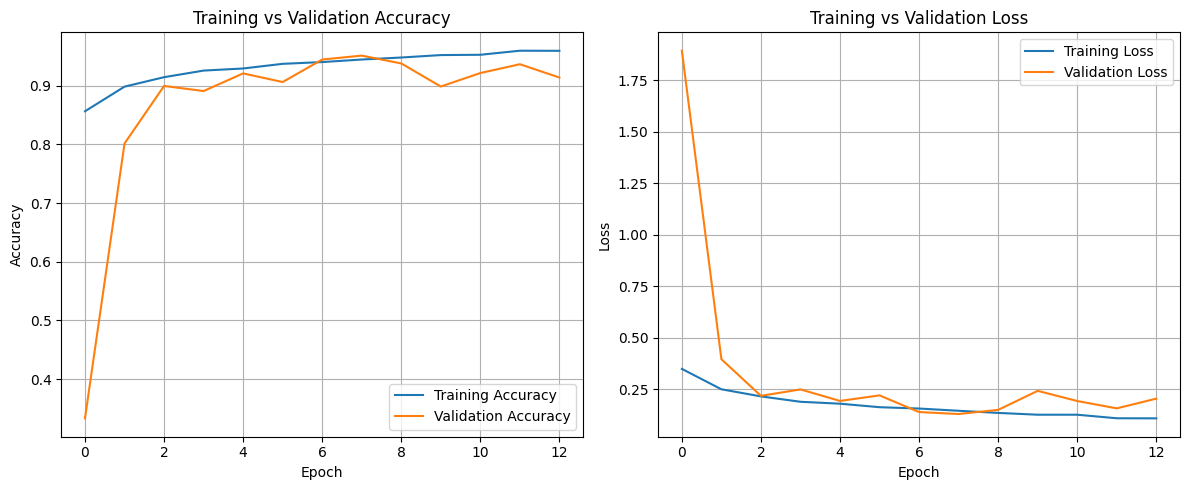

In [27]:
import matplotlib.pyplot as plt

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
